## **Práctica: Pronóstico a travéés de Regresión Lineal Múltiple (RLM)**

Nombre: Alfonso Murrieta Villegas

Email: alfonsomvmx@outlook.com

### **Descripcióón del caso de estudio**

Se tienen mediciones de registros geofísicos convencionales: 
1. RC1 (Registro Neutrón)
2. RC2 (Registro Sónico)
3. RC3 (Registro Densidad-Neutrón) 
4. RC4 (Registro Densidad -corregido por arcilla-)

Objetivo: 
*Se* desea obtener el pronóstico de la saturación de aceite remanente (ROS, Residual Oil Saturation)

###  **Importación de datos y bibliotecas**


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Biblioteca para graficación:
import seaborn as sb           
%matplotlib inline 

Carga de modelos de regresión lineal

In [22]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, max_error, mean_absolute_error

Carga de datos mediante google drive

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
RegistrosGeo = pd.read_table('/content/RGeofisicos.txt')
RegistrosGeo.head()

,Profundidad,RC1,RC2,RC3,RC4
0,5660.0,0.777924,0.814029,0.675698,0.757842
1,5660.5,0.796239,0.813167,0.748670,0.793872
2,5661.0,0.769231,0.797562,0.702285,0.748362
3,5661.5,0.764774,0.790365,0.680289,0.738451
4,5662.0,0.773813,0.788184,0.700248,0.718462


### **Graficación y visualización de los datos**


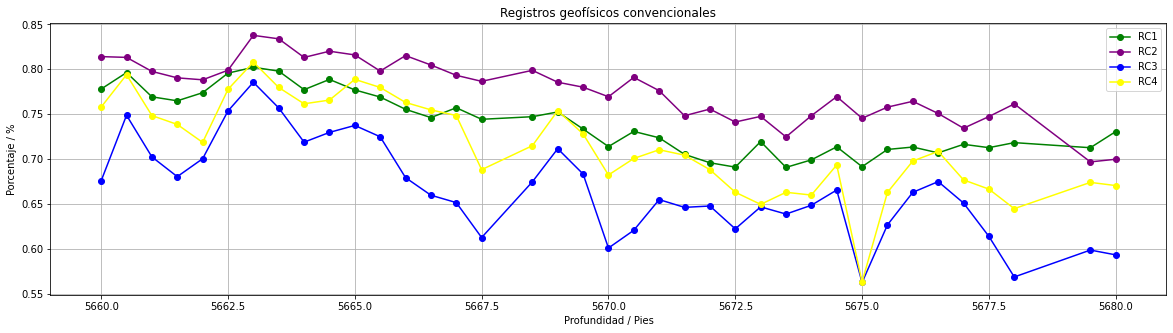

In [25]:
plt.figure(figsize=(20, 5))
plt.plot(RegistrosGeo['Profundidad'], RegistrosGeo['RC1'], color='green', marker='o', label='RC1')
plt.plot(RegistrosGeo['Profundidad'], RegistrosGeo['RC2'], color='purple', marker='o', label='RC2')
plt.plot(RegistrosGeo['Profundidad'], RegistrosGeo['RC3'], color='blue', marker='o', label='RC3')
plt.plot(RegistrosGeo['Profundidad'], RegistrosGeo['RC4'], color='yellow', marker='o', label='RC4')
plt.xlabel('Profundidad / Pies')
plt.ylabel('Porcentaje / %')
plt.title('Registros geofísicos convencionales')
plt.grid(True)
plt.legend()
plt.show()

### **Selección de variables y treaning del modelo**

En primera instancia se designan las variables predictoras (X) y la variable a pronosticar (Y) 

In [26]:
X_train = np.array(RegistrosGeo[['Profundidad', 'RC1', 'RC2','RC3']])
pd.DataFrame(X_train).head(10)

,0,1,2,3
0,5660.0,0.777924,0.814029,0.675698
1,5660.5,0.796239,0.813167,0.748670
2,5661.0,0.769231,0.797562,0.702285
3,5661.5,0.764774,0.790365,0.680289
4,5662.0,0.773813,0.788184,0.700248
5,5662.5,0.795627,0.798850,0.753472
6,5663.0,0.802155,0.837717,0.785441
7,5663.5,0.797878,0.833851,0.756847
8,5664.0,0.777206,0.813117,0.718713
9,5664.5,0.788604,0.820041,0.729582


In [27]:
Y_train = np.array(RegistrosGeo[['RC4']])
pd.DataFrame(Y_train).head(10)

,0
0,0.757842
1,0.793872
2,0.748362
3,0.738451
4,0.718462
5,0.777537
6,0.807957
7,0.779641
8,0.761454
9,0.765600


Definición del modelo y training del modelo



In [28]:
RMultiple = linear_model.LinearRegression()
RMultiple.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Resultados obtenidos tras el prónostico con los que se calcularán los errores a través de las diferencias

In [29]:
Y_pronostico = RMultiple.predict(X_train)
pd.DataFrame(Y_pronostico).head(10)

,0
0,0.747294
1,0.792029
2,0.752073
3,0.737382
4,0.751189
5,0.790661
6,0.818408
7,0.801339
8,0.767461
9,0.780089


Obtención de la efectividad del modelo:

In [30]:
print('=> Coeficientes: \n', RMultiple.coef_)
print('=> Intercepto: \n', RMultiple.intercept_)
print("=> Error residual: %.4f" % max_error(Y_train, Y_pronostico))
print('=> Score: %.4f' % r2_score(Y_train, Y_pronostico))

=> Coeficientes: 
 [[-7.50589329e-05  5.06619053e-01  2.27471256e-01  4.89091335e-01]]
=> Intercepto: 
 [0.26237022]
=> Error residual: 0.0684
=> Score: 0.8581


### **Graficación y comparación con los datos dados por el modelo de RLM**


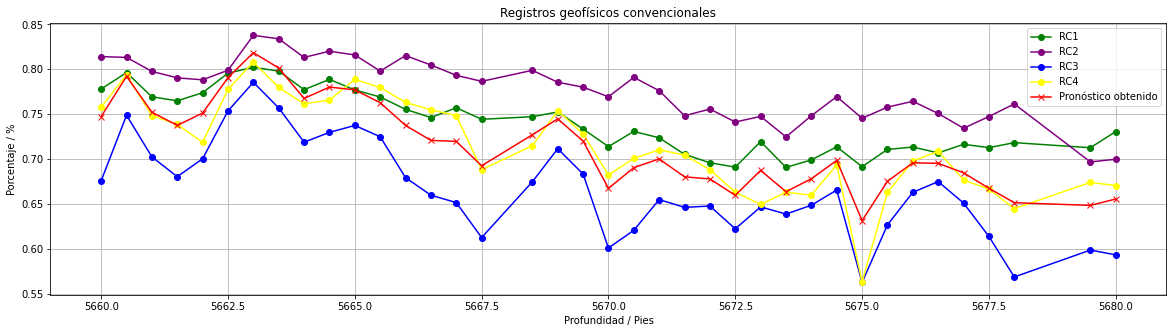

In [31]:
plt.figure(figsize=(20, 5))
plt.plot(RegistrosGeo['Profundidad'], RegistrosGeo['RC1'], color='green', marker='o', label='RC1')
plt.plot(RegistrosGeo['Profundidad'], RegistrosGeo['RC2'], color='purple', marker='o', label='RC2')
plt.plot(RegistrosGeo['Profundidad'], RegistrosGeo['RC3'], color='blue', marker='o', label='RC3')
plt.plot(RegistrosGeo['Profundidad'], RegistrosGeo['RC4'], color='yellow', marker='o', label='RC4')
plt.plot(RegistrosGeo['Profundidad'], Y_pronostico, color='red', marker='x', label='Pronóstico obtenido')
plt.xlabel('Profundidad / Pies')
plt.ylabel('Porcentaje / %')
plt.title('Registros geofísicos convencionales')
plt.grid(True)
plt.legend()
plt.show()

### **Conclusión y resultado final** 

1. A continuación se muestra el modelo obtenido tras el training y análisis mediante una regresióón lineal multiple

2. El módelo de Regresión: 
**Y = a + b1Profundidad + b2RC1 + b3RC2 + u**

3. Módelo obtenido (Representado en la gráfica previa de color rojo)

**Y = 0.2623 − 0.000075Profundidad + 0.5066RC1 + 0.2274RC2 + 0.4890RC3 + 0.0684**



